In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab as pl
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score

In [2]:
df = pd.read_csv('track_data.csv', index_col=0)

df.drop_duplicates(subset=['Track IDs'], keep='first', inplace=True)

df.head()

,Artists,Moods,Names,Preview URLs,Track IDs,Instrumentalness,Modality,Speechiness,Energy,Tempo,Valence,Loudness
0,Lauv,sad,"fuck, i'm lonely (with Anne-Marie) - from “13 ...",https://p.scdn.co/mp3-preview/f516b7ef3c83e390...,322tcqPhma7F6hfCeLisx0,0.000000,1,0.0683,0.558,95.016,0.678,-6.460
1,Sabrina Carpenter,sad,In My Bed,NaN,2o0KMNhcw5KO7CuslvR4Xs,0.002290,0,0.0950,0.385,109.046,0.666,-6.024
2,Bea Miller,sad,feel something,https://p.scdn.co/mp3-preview/82b929ed0adcbb9a...,7JDWhC422Gtk1Bq0mL3OTC,0.000156,1,0.0707,0.415,136.029,0.156,-8.914
3,Carly Rae Jepsen,sad,Favourite Colour,https://p.scdn.co/mp3-preview/1ff4b4b52fe3f888...,17mS1Cr70SD2PTOTnqL3LT,0.000005,1,0.0519,0.658,146.007,0.677,-5.386
4,MUNA,sad,Who,https://p.scdn.co/mp3-preview/d83fd740dfcd06d9...,0qTBo7ExHHGI7RLCk3CwDS,0.000272,0,0.0514,0.667,150.093,0.219,-5.770


In [17]:
X = df.iloc[:, 5:].values
y = df.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=13)

In [18]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
logregcv = LogisticRegressionCV(Cs=[100000,200000,300000], cv=3) 
logregcv.fit(X_train,y_train)

LogisticRegressionCV(Cs=[100000, 200000, 300000], class_weight=None, cv=3,
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='warn',
                     n_jobs=None, penalty='l2', random_state=None, refit=True,
                     scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [20]:
acc_train_cv = logregcv.score(X_train, y_train)
acc_test_cv = logregcv.score(X_test, y_test)
print("train_score=%.3f\ntest_score =%.3f\n" % (acc_train_cv, acc_test_cv))

train_score=0.799
test_score =0.814



In [21]:
print(logregcv.classes_)
print(logregcv.C_)
print(logregcv.intercept_)
print(logregcv.coef_)


['happy' 'sad']
[100000]
[-0.42807826]
[[-0.25206834 -0.00579005 -0.13061621 -1.02959774  0.11941994 -1.19715495
  -0.27854642]]


In [25]:
y_pred = logregcv.predict(X_test)

log_confusion = confusion_matrix(y_test, y_pred)

print(log_confusion)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, pos_label='happy'))
print(recall_score(y_test, y_pred, pos_label='happy'))

[[158  27]
 [ 34 109]]
              precision    recall  f1-score   support

       happy       0.82      0.85      0.84       185
         sad       0.80      0.76      0.78       143

    accuracy                           0.81       328
   macro avg       0.81      0.81      0.81       328
weighted avg       0.81      0.81      0.81       328

0.8140243902439024
0.8229166666666666
0.8540540540540541


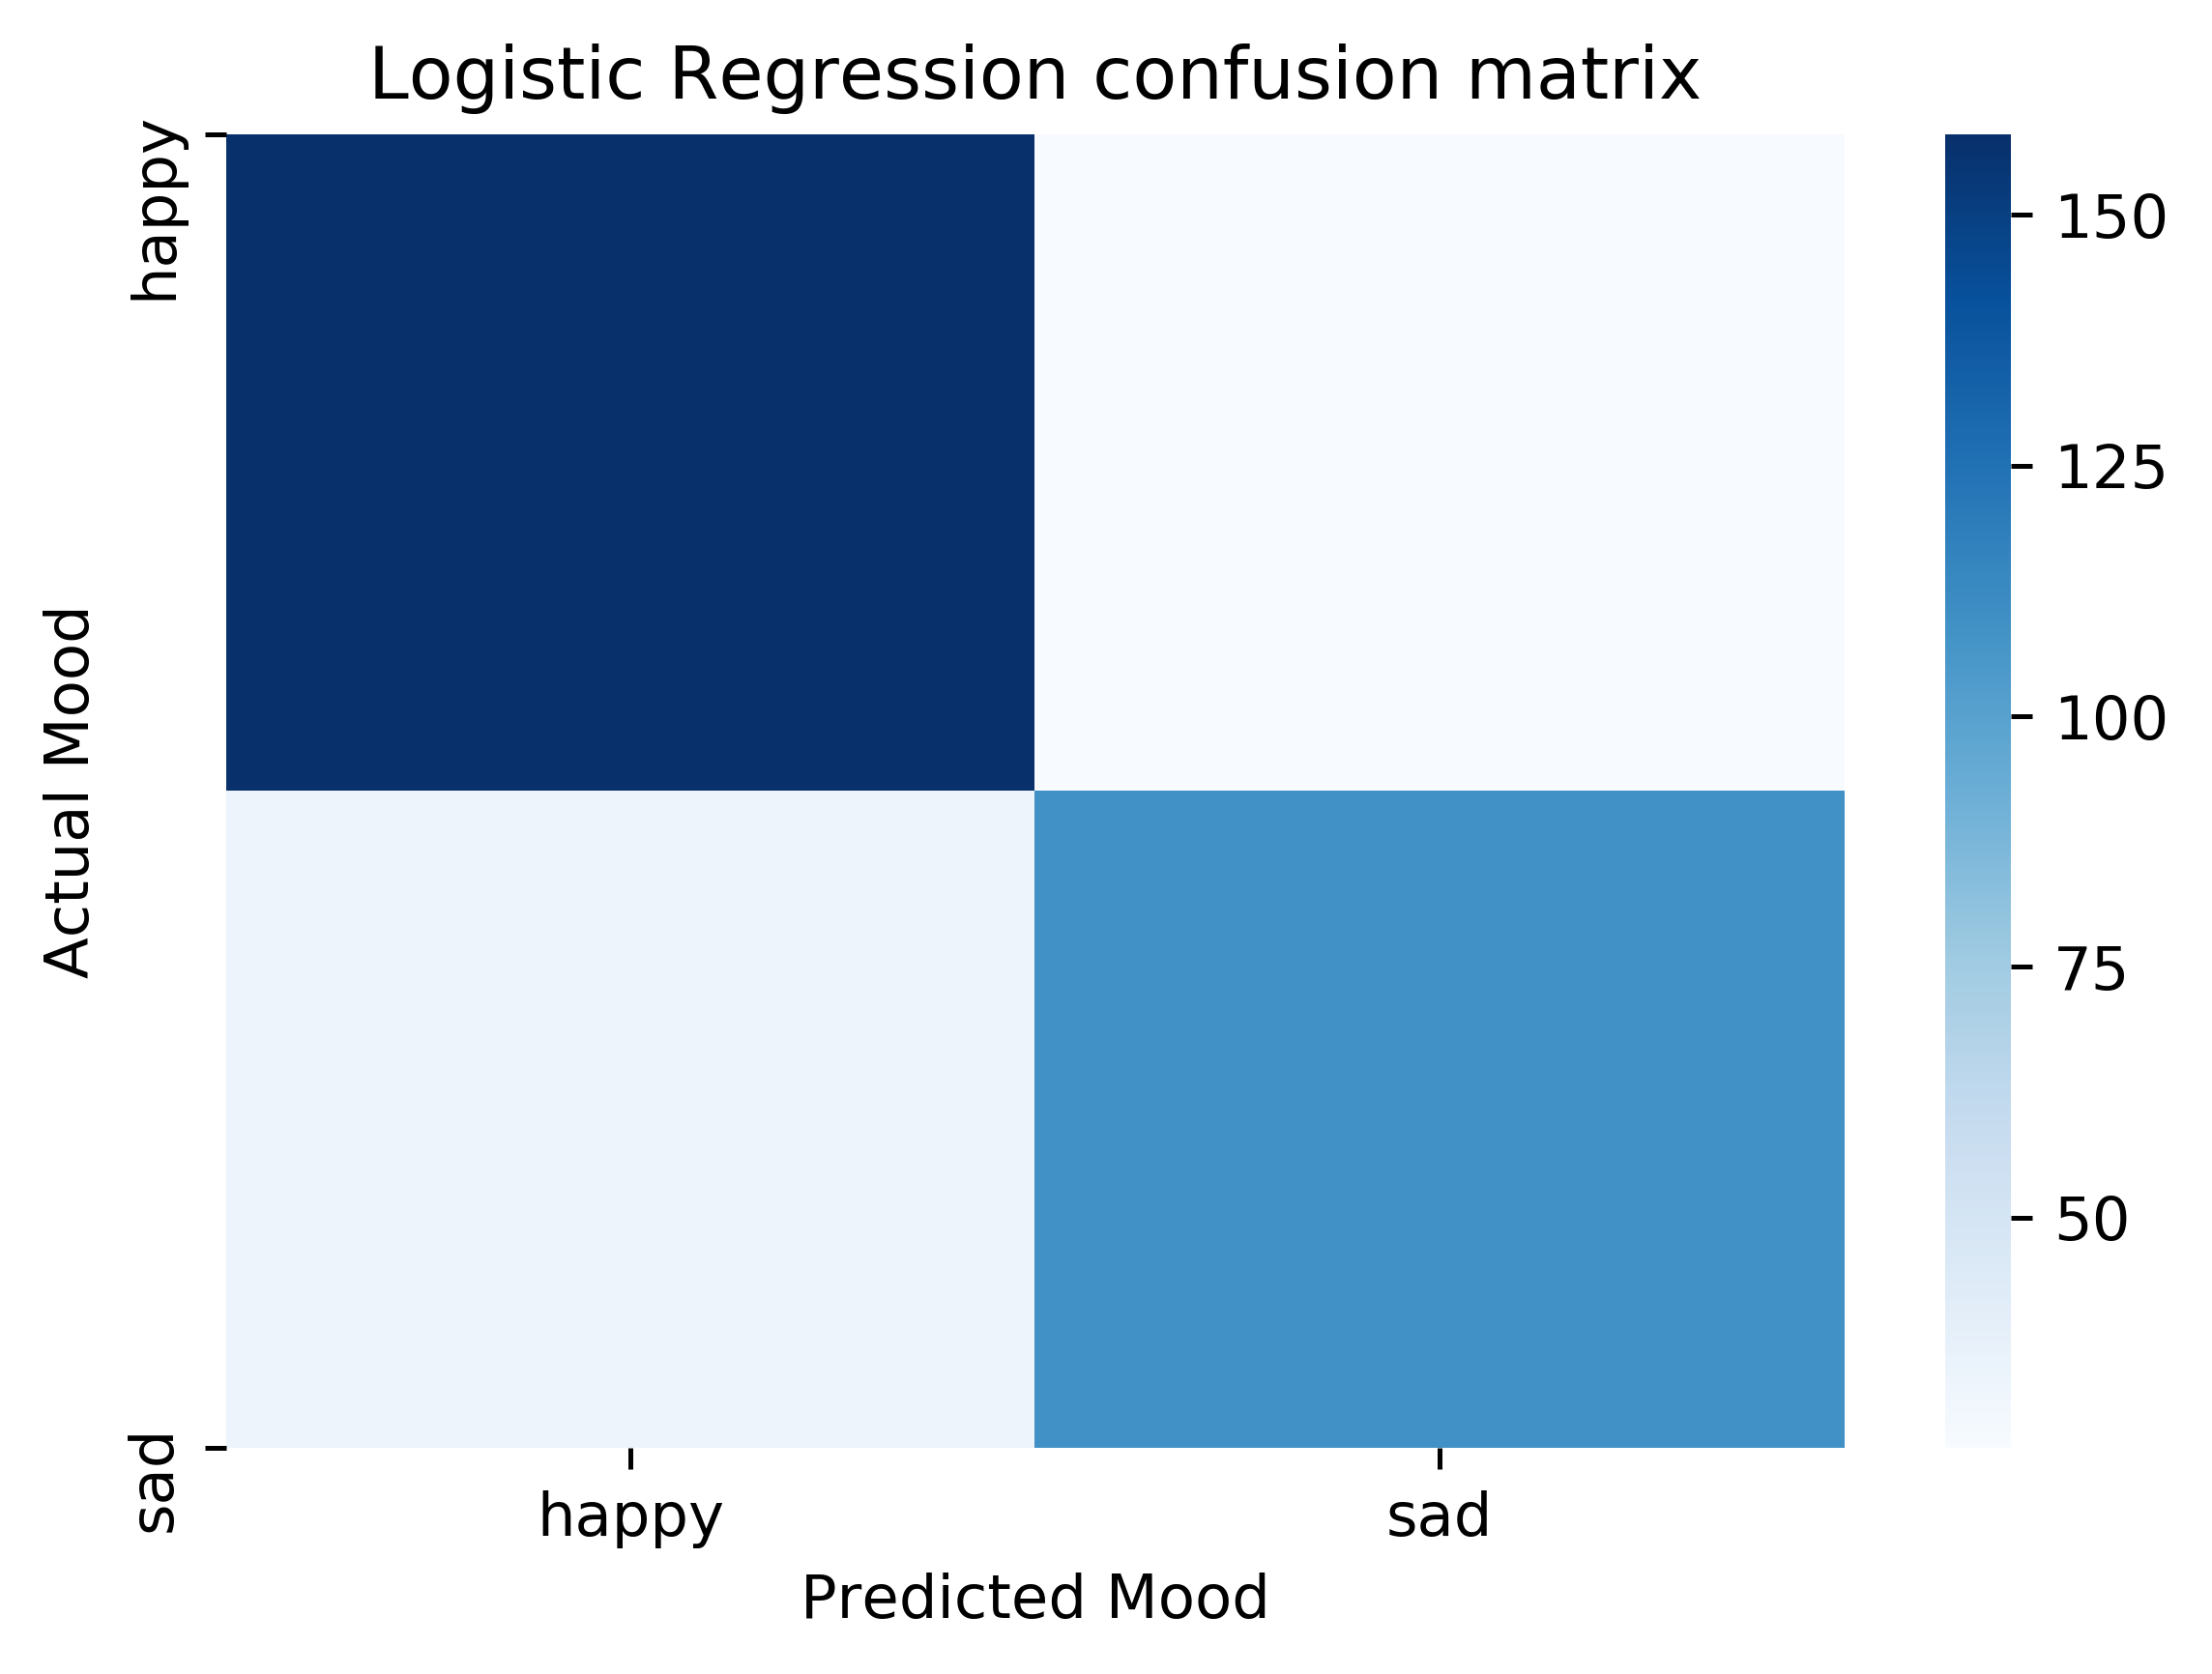

In [133]:
plt.figure(dpi=450)
sns.heatmap(log_confusion, cmap=plt.cm.Blues,
           xticklabels=['happy', 'sad'],
           yticklabels=['happy', 'sad'])

plt.xlabel('Predicted Mood')
plt.ylabel('Actual Mood')
plt.title('Logistic Regression confusion matrix');
plt.savefig('LogReg.png')

In [16]:
y_test = 'sad' == y_test

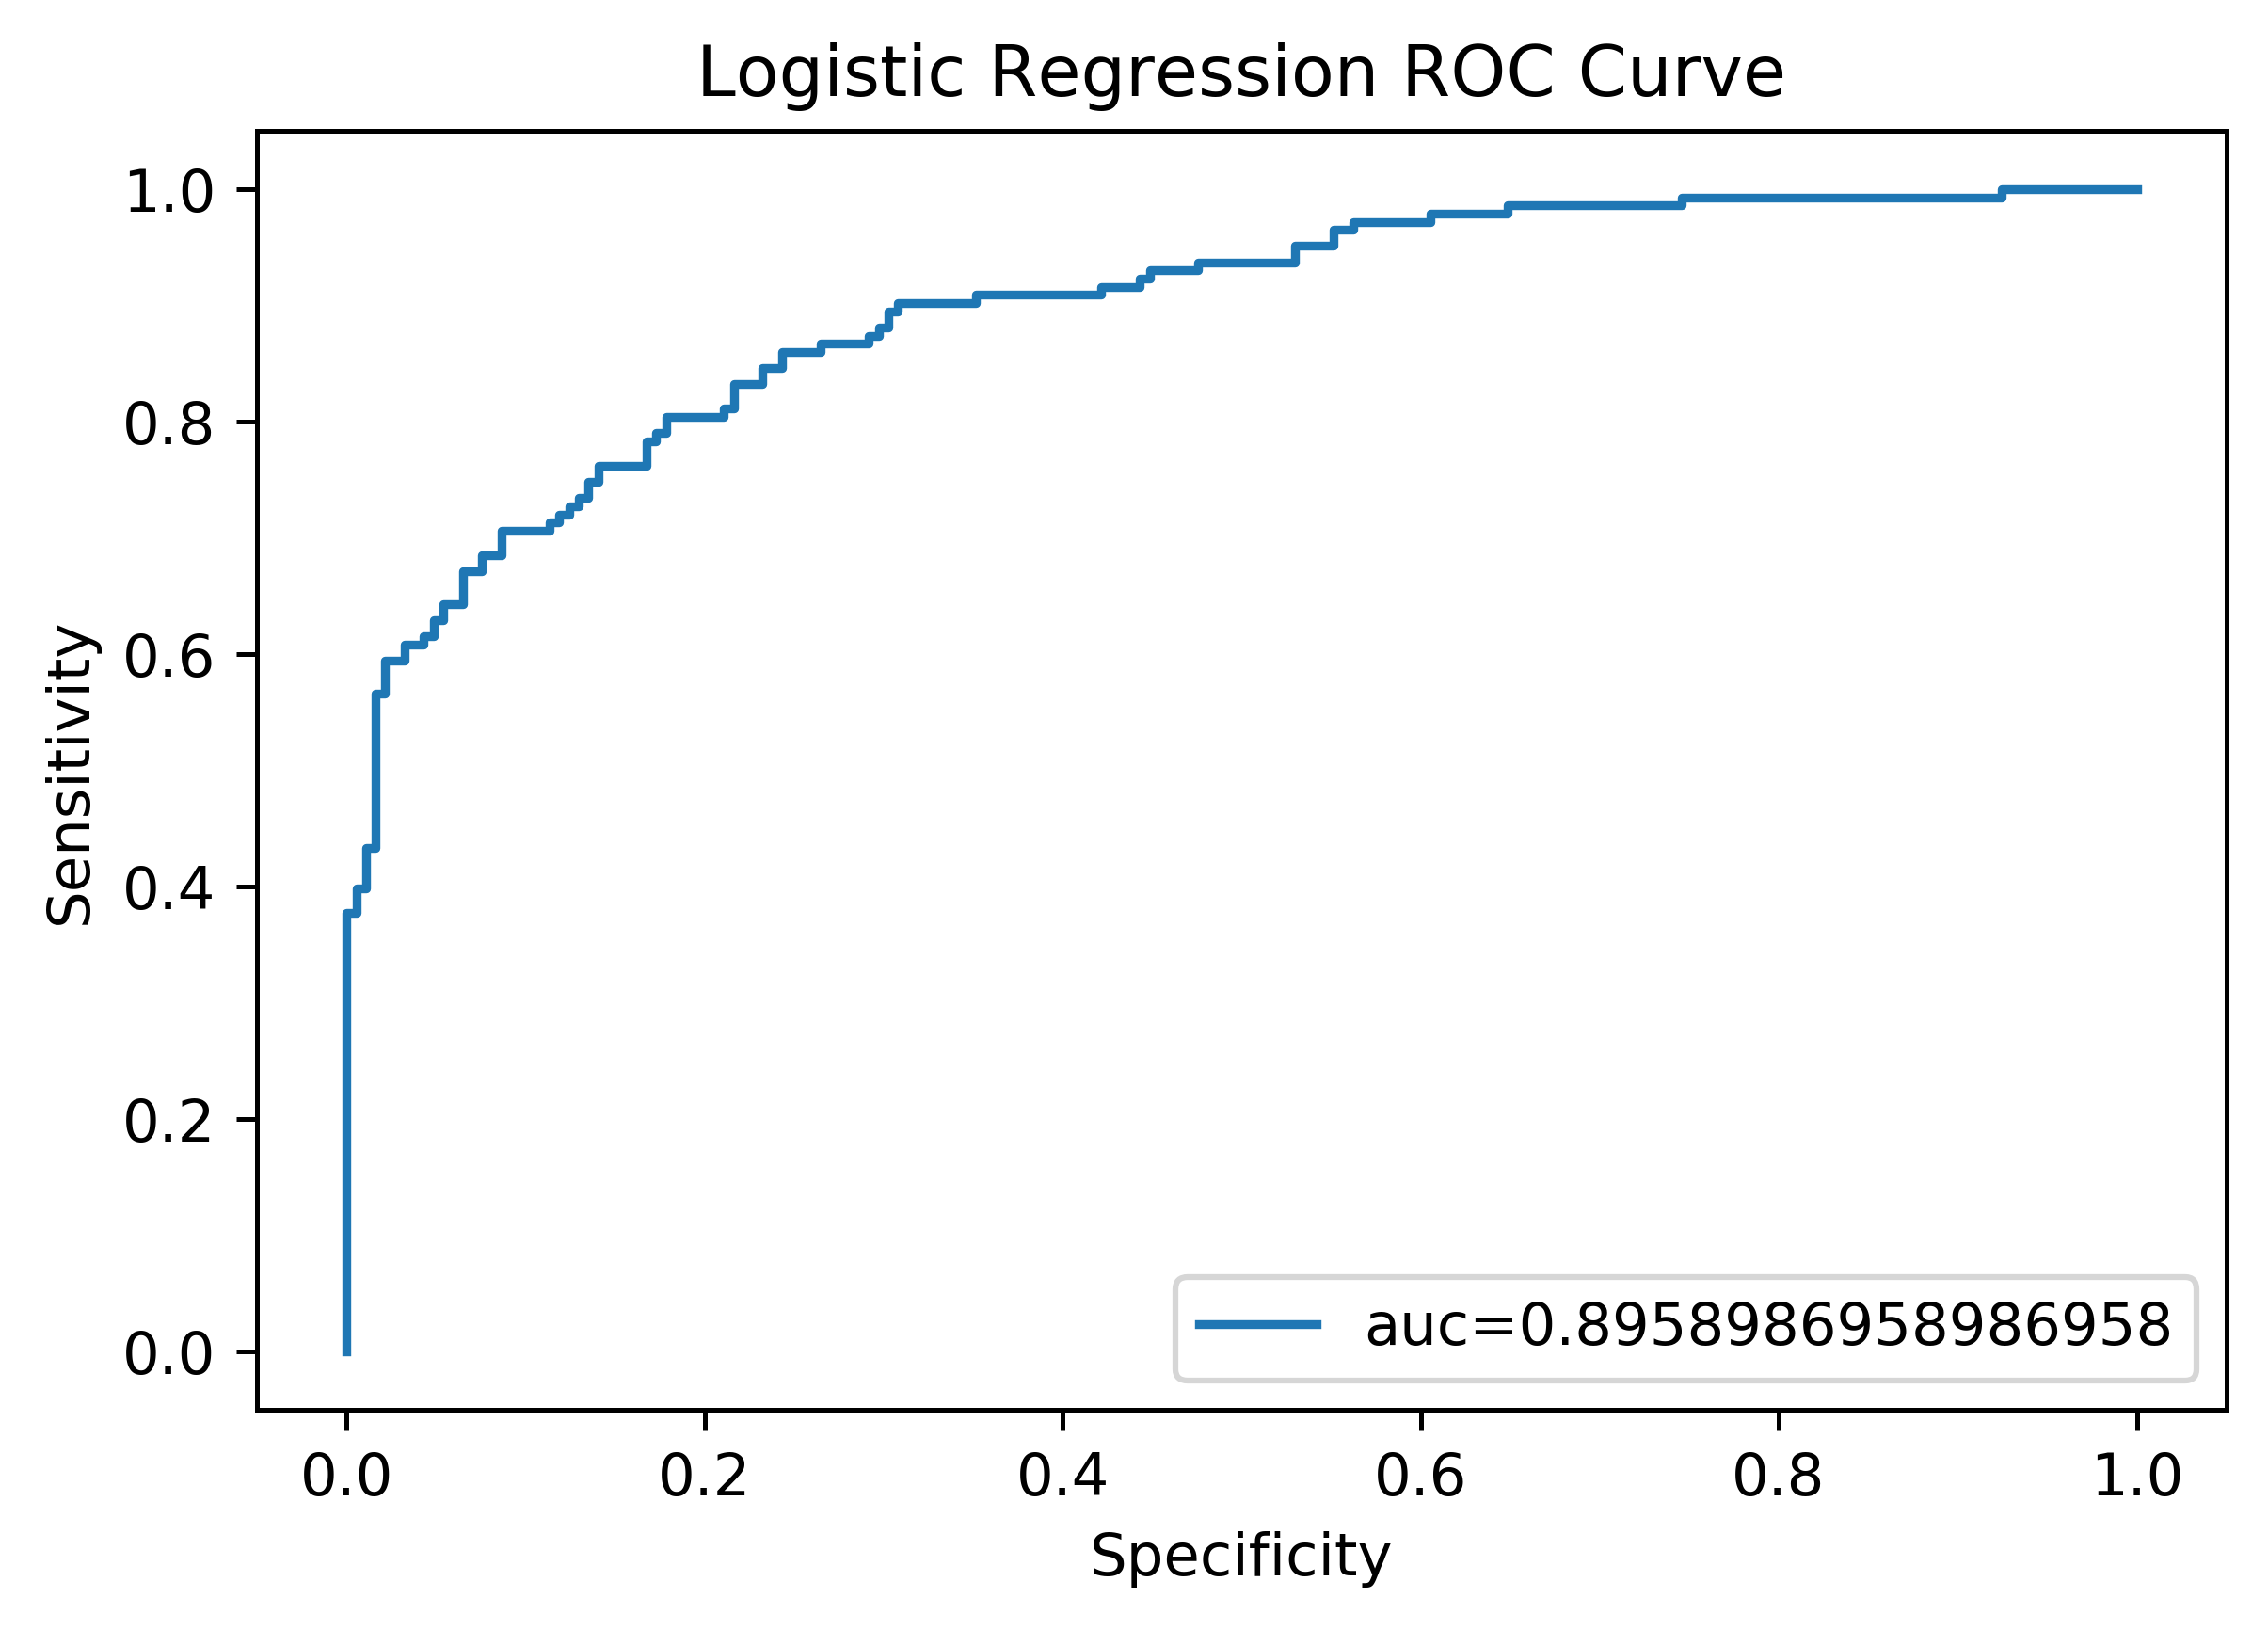

In [137]:
y_pred_proba = logregcv.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.figure(dpi=450)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.title('Logistic Regression ROC Curve');
plt.savefig('LogRegROC.png')
plt.show()